In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

### Regression line vs other lines

In [2]:
def standard_units(arr):
    """ Converts an array to standard units """
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    """ Computes correlation: t is a table, and x and y are column names """
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates (predictions) at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

In [3]:
def demographics_errors(slope, intercept):
    # Use four convenient points from the original data
    sample = [[14.7, 33995], [19.1, 61454], [50.7, 71183], [59.5, 105918]]
    demographics.scatter('College%', 'Median Income', alpha=0.5)
    xlims = make_array(5, 75)
    # Plot a line with the slope and intercept you specified:
    plots.plot(xlims, slope * xlims + intercept, lw=4)
    # Plot red lines from each of the four points to the line
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=4)

In [5]:
demographics = Table.read_table('district_demographics2016.csv')
demographics = demographics.drop(
    'State', 'District', 'Percent voting for Clinton')
demographics.show(5)

Median Income,College%
47083,24
42035,21.8
46544,22.8
41110,17
51690,30.3


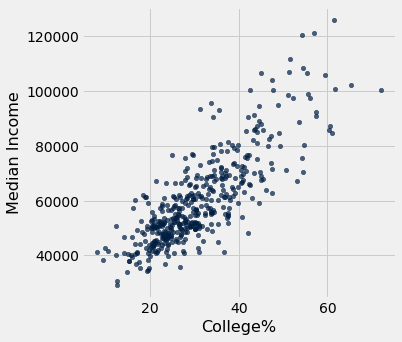

In [6]:
demographics.scatter('College%', 'Median Income')

In [6]:
correlation(demographics, 'College%', 'Median Income')

0.8184648517141335

In [7]:
regression_slope = slope(demographics, 'College%', 'Median Income')
regression_intercept = intercept(demographics, 'College%', 'Median Income')
regression_slope, regression_intercept

(1270.70168946388, 20802.577766677925)

In [8]:
predicted = fitted_values(demographics, 'College%', 'Median Income')

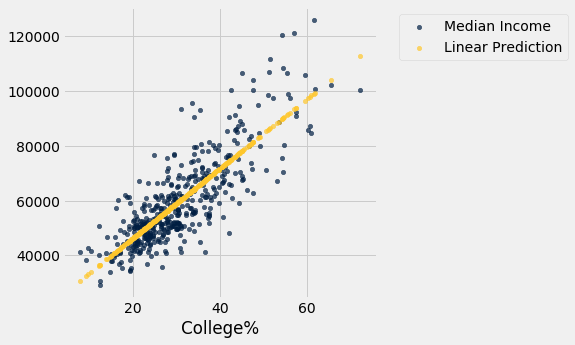

In [9]:
demographics = demographics.with_column(
    'Linear Prediction', predicted)
demographics.scatter('College%')

In [10]:
actual = demographics.column('Median Income')
errors = actual - predicted

In [11]:
demographics.with_column('Error', errors)

Median Income,College%,Linear Prediction,Error
47083,24,51299.4,-4216.42
42035,21.8,48503.9,-6468.87
46544,22.8,49774.6,-3230.58
41110,17,42404.5,-1294.51
51690,30.3,59304.8,-7614.84
61413,36.7,67437.3,-6024.33
34664,19.4,45454.2,-10790.2
76440,29.6,58415.3,18024.7
50537,24.5,51934.8,-1397.77
49072,34,64006.4,-14934.4


In [12]:
np.mean(errors)

6.356008950321154e-13

In [13]:
np.mean(errors ** 2) ** 0.5

9398.515588571281

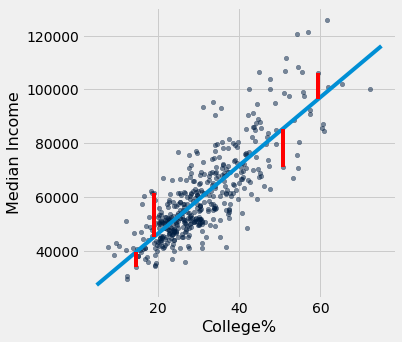

In [14]:
demographics_errors(regression_slope, regression_intercept)

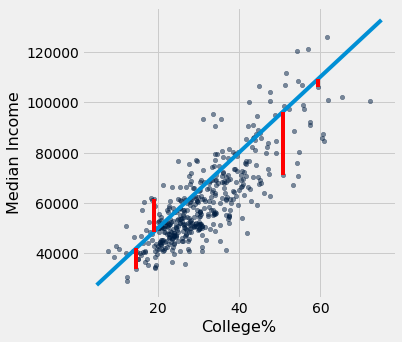

In [15]:
# takes any slope, any intercept

demographics_errors(1500, 20000)

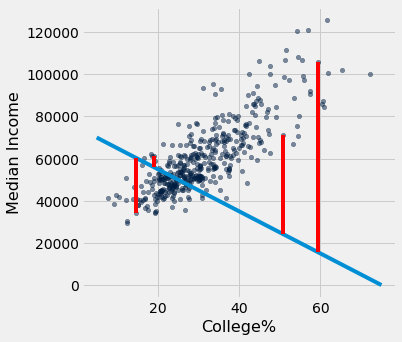

In [16]:
demographics_errors(-1000, 75000)

### Root Mean Square Error ###

In [ ]:
def show_demographics_rmse(slope, intercept):
    demographics_errors(slope, intercept)
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    prediction = slope * x + intercept
    mse = np.mean((y - prediction) ** 2)
    print("Root mean squared error:", round(mse ** 0.5, 2))

In [ ]:
show_demographics_rmse(-1000, 75000)

In [ ]:
show_demographics_rmse(1500, 20000)

In [ ]:
show_demographics_rmse(regression_slope, regression_intercept)

### Numerical Optimization ###

In [ ]:
x = np.arange(1, 3, 0.1)
y = (x-2)**2 + 3
Table().with_columns('x', x, 'y', y).plot('x')

In [ ]:
def f(x):
    return ((x-2)**2) + 3

In [ ]:
minimize(f)

In [ ]:
def complicated_function(x):
    return 2 * np.sin(x*np.pi) + x ** 3 + x ** 4 

In [ ]:
x = np.arange(-1.5, 1.5, 0.05)
y2 = complicated_function(x)
Table().with_columns('x', x, 'y', y2).plot('x')

In [ ]:
minimize(complicated_function)

### Minimizing RMSE ###

In [ ]:
def demographics_rmse(any_slope, any_intercept):
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) ** 0.5

In [ ]:
demographics_rmse(1500, 20000)

In [ ]:
demographics_rmse(-1000, 75000)

In [ ]:
minimize(demographics_rmse)

In [ ]:
make_array(regression_slope, regression_intercept)

### Nonlinear Regression ###

In [ ]:
shotput = Table.read_table('shotput.csv')
shotput

In [ ]:
shotput.scatter('Weight Lifted')

In [ ]:
def shotput_linear_rmse(any_slope, any_intercept):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = any_slope*x + any_intercept
    return np.mean((y - estimate) ** 2) ** 0.5

In [ ]:
best_line = minimize(shotput_linear_rmse)
best_line

In [ ]:
weights = shotput.column(0)

In [ ]:
linear_fit = best_line.item(0)*weights + best_line.item(1)

shotput.with_column(
    'Best Line', linear_fit
).scatter(0)

In [ ]:
correlation(shotput, 'Shot Put Distance', 'Weight Lifted')

**Quadratic Function**

$$
f(x) ~=~ ax^2 + bx + c
$$
for constants $a$, $b$, and $c$.



In [ ]:
def shotput_quadratic_rmse(a, b, c):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = a*(x**2) + b*x + c
    return np.mean((y - estimate) ** 2) ** 0.5

In [ ]:
best_quad = minimize(shotput_quadratic_rmse)
best_quad

In [ ]:
# x = weight lifted = 100 kg
# Then predicted shot put distance:

(-0.00104)*(100**2) + 0.2827*100 - 1.5318

In [ ]:
quad_fit = best_quad.item(0)*(weights**2) + best_quad.item(1)*weights + best_quad.item(2)

In [ ]:
shotput.with_column('Best Quadratic Curve', quad_fit).scatter(0)

## Residuals

In [ ]:
def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

In [ ]:
demographics = demographics.with_columns(
    'Fitted Value', fitted_values(demographics, 'College%', 'Median Income'),
    'Residual', residuals(demographics, 'College%', 'Median Income')
)
demographics

In [ ]:
demographics.scatter('College%')

In [ ]:
demographics.scatter('College%')

In [ ]:
def plot_residuals(t, x, y):
    tbl = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    tbl.select(x, y, 'Fitted').scatter(0)
    tbl.scatter(x, 'Residual')

In [ ]:
plot_residuals(demographics, 'College%', 'Median Income')

In [ ]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )
plot_residuals(heights, 'MidParent', 'Child')

## Dugongs ##

In [ ]:
dugong = Table.read_table('dugong.csv')
dugong.show(5)

In [ ]:
dugong.scatter('Length', 'Age')

In [ ]:
correlation(dugong, 'Length', 'Age')

In [ ]:
plot_residuals(dugong, 'Length', 'Age')

# US Women

In [ ]:
us_women = Table.read_table('us_women.csv')
us_women.show(5)

In [ ]:
correlation(us_women, 'height', 'ave weight')

In [ ]:
plot_residuals(us_women, 'height', 'ave weight')

## Average of Residuals ##

In [ ]:
round(np.average(residuals(dugong, 'Length', 'Age')), 6)

In [ ]:
round(np.average(residuals(heights, 'MidParent', 'Child')), 6)

In [ ]:
round(np.average(residuals(demographics, 'College%', 'Median Income')), 6)

In [ ]:
heights = heights.with_columns(
    'Residual', residuals(heights, 'MidParent', 'Child'),
    'Fitted Value', fitted_values(heights, 'MidParent', 'Child')
)


In [ ]:
round(correlation(heights, 'MidParent', 'Residual'), 6)

In [ ]:
round(correlation(heights, 'Fitted Value', 'Residual'), 6)

## A Measure of Clustering ##

In [ ]:
def plot_fitted(t, x, y):
    tbl = t.select(x, y)
    tbl.with_columns('Fitted Value', fitted_values(t, x, y)).scatter(0)

In [ ]:
plot_fitted(heights, 'MidParent', 'Child')

In [ ]:
child_predictions_sd = np.std(fitted_values(heights, 'MidParent', 'Child'))
child_observed_sd = np.std(heights.column('Child'))
print(child_predictions_sd)
print(child_observed_sd)

In [ ]:
child_predictions_sd / child_observed_sd

In [ ]:
correlation(heights, 'MidParent', 'Child')

In [ ]:
correlation(dugong, 'Length', 'Age')

In [ ]:
dugong_prediction_sd = np.std(fitted_values(dugong, 'Length', 'Age'))
dugong_observed_sd = np.std(dugong.column(1))
dugong_prediction_sd / dugong_observed_sd

In [ ]:
hybrid = Table.read_table('hybrid.csv')
hybrid.show(5)

In [ ]:
plot_residuals(hybrid, 'acceleration', 'mpg')

In [ ]:
correlation(hybrid, 'acceleration', 'mpg')

In [ ]:
np.std(fitted_values(hybrid, 'acceleration', 'mpg'))/np.std(hybrid.column('mpg'))

No matter what the shape of the scatter plot, the SD of the fitted values is a fraction of the SD of the observed values of $y$. The fraction is |r|.

$$
\frac{\mbox{SD of fitted values}}{\mbox{SD of }y} ~=~ |r| ~~~~~~~~~~ \mbox{That is,} ~~ \mbox{SD of fitted values} = |r|\cdot \mbox{SD of }y
$$

## SD of the Residuals ##
No matter what the shape of the scatter plot, the SD of the residuals is a fraction of the SD of the observed values of $y$. The fraction is  $\sqrt{1-r^2}$.

$$
\mbox{SD of residuals} ~=~ \sqrt{1 - r^2} \cdot \mbox{SD of }y
$$

In [ ]:
plot_fitted(heights, 'MidParent', 'Child')

In [ ]:
plot_fitted(heights, 'MidParent', 'Child')
ave_child = np.mean(heights.column('Child'))
plots.plot([64, 76], [ave_child, ave_child]);

In [ ]:
np.std(heights.column('Child')) ** 2

In [ ]:
np.std(residuals(heights, 'MidParent', 'Child')) ** 2

In [ ]:
np.std(heights.column('Fitted Value')) ** 2

In [ ]:
np.std(dugong.column('Age')) ** 2

In [ ]:
np.std(fitted_values(dugong, 'Length', 'Age')) ** 2

In [ ]:
np.std(residuals(dugong, 'Length', 'Age')) ** 2

In [ ]:
r = correlation(heights, 'MidParent', 'Child')
r

In [ ]:
np.sqrt(1 - r**2) * np.std(heights.column('Child'))

In [ ]:
np.std(residuals(hybrid, 'acceleration', 'mpg'))

In [ ]:
r = correlation(hybrid, 'acceleration', 'mpg')
r

In [ ]:
np.sqrt(1 - r**2)*np.std(hybrid.column('mpg'))